# practise_chapter_13

## linear_model

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [3]:
ds = pd.read_csv(
    "../data/shampoo-sales.csv",
    header=0,
    index_col=0,
).squeeze()
ds.head()

Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
Name: Sales, dtype: float64

In [4]:
def parser(x):
    return datetime.strptime("190" + x, "%Y-%m")

In [56]:
ds.index = [parser(x) for x in ds.index]
ds.head()

1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

In [9]:
X = [i for i in range(0, len(ds))]
X = np.reshape(X, (len(X), 1))
y = ds.values

In [11]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [14]:
trend = model.predict(X)
trend

array([101.21621622, 113.29528958, 125.37436293, 137.45343629,
       149.53250965, 161.61158301, 173.69065637, 185.76972973,
       197.84880309, 209.92787645, 222.00694981, 234.08602317,
       246.16509653, 258.24416988, 270.32324324, 282.4023166 ,
       294.48138996, 306.56046332, 318.63953668, 330.71861004,
       342.7976834 , 354.87675676, 366.95583012, 379.03490347,
       391.11397683, 403.19305019, 415.27212355, 427.35119691,
       439.43027027, 451.50934363, 463.58841699, 475.66749035,
       487.74656371, 499.82563707, 511.90471042, 523.98378378])

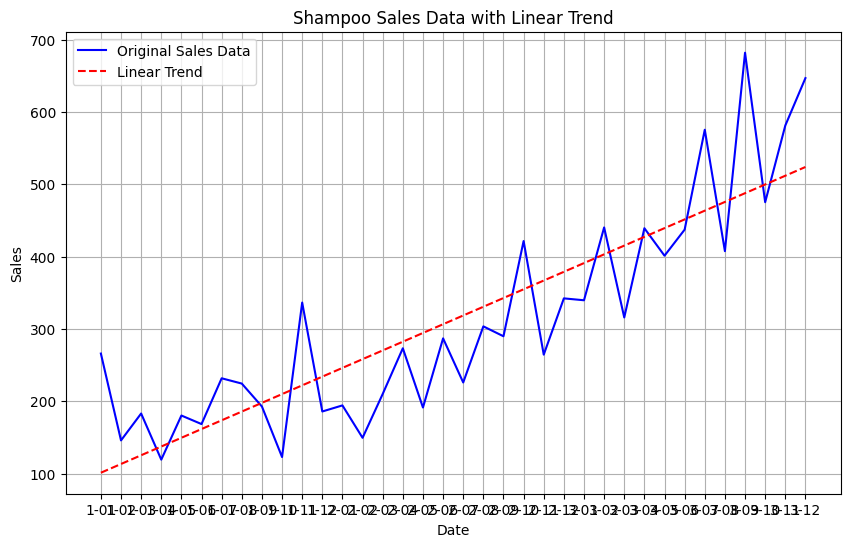

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(ds.index, y, "b-", label="Original Sales Data")
plt.plot(ds.index, trend, "r--", label="Linear Trend")
plt.title("Shampoo Sales Data with Linear Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

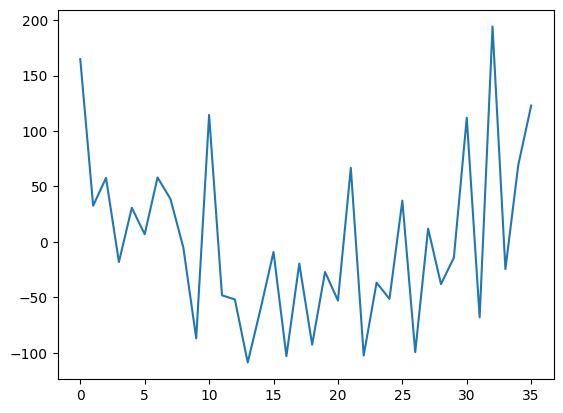

In [20]:
detrended = [y[i] - trend[i] for i in range(0, len(ds))]
plt.plot(detrended)
plt.show()

## differenced

In [21]:
ds = pd.read_csv(
    "../data/shampoo-sales.csv",
    header=0,
    index_col=0,
).squeeze()
ds.head()

Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
Name: Sales, dtype: float64

In [22]:
def parser(x):
    return datetime.strptime("190" + x, "%Y-%m")

In [23]:
ds.index = [parser(x) for x in ds.index]
ds.head()

1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

In [28]:
X = ds.values
len(X)

36

In [29]:
X[:5]

array([266. , 145.9, 183.1, 119.3, 180.3])

In [26]:
diff = list()

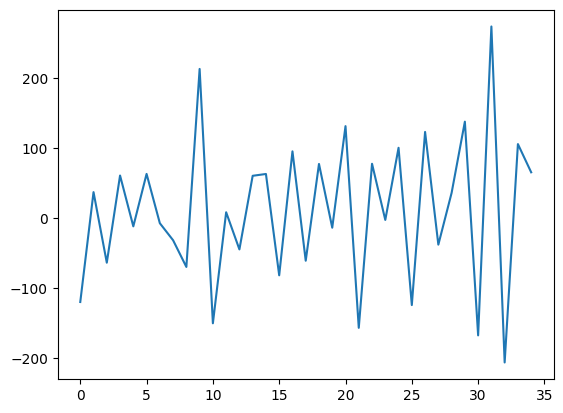

In [30]:
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)

plt.plot(diff)
plt.show()